<center><h1> Data Visualization - Tableau </h1></center>
<center><h2> Ricardo Alamo </h2></center>
<center><h2> The economic and lose of life effect furing COVID-19 </h2></center>

# Table of Contents
1. [Installing Libraries](#1.Installing-libraries)
2. [Loading and cleaning Financial Data with yfinance](#2.Loading-and-cleaning-Financial-Data-with-yfinance)
3. [Loading and cleaning COVID Data](#3.Loading-and-cleaning-COVID-Data)
4. [Loading and cleaning GDP OECD Data](#4.Loading-and-cleaning-GDP-OECD-Data)
5. [Merging DF's and final export to Tableau](#5.Merging-DF's-and-final-export-to-Tableau)



# Objective

The primary goal of this project is to investigate and visualize the economic and social impact of the COVID-19 pandemic in the United States and other OECD countries, focusing specifically on the period from 2019 to 2023. The year 2019 serves as a pre-pandemic benchmark for the analysis. 

This project comprises three main sections:

1. **US Market Analysis**: For this segment, financial data pertaining to three major indices - S&P 500, Dow Jones, and NASDAQ - were extracted from Yahoo Finance using `yfinance`. Additionally, the 10-year treasury yield data was also collected as an economic indicator. This data set will provide insights into the US economy's trajectory before, during, and after the pandemic. 

2. **International GDP Analysis**: This section seeks to broaden the perspective beyond the US, focusing on the GDP growth of OECD countries. These countries were selected due to the reliability of their data. The weekly GDP growth data was sourced from the [OECD's website](https://www.oecd.org/economy/weekly-tracker-of-gdp-growth/) and will be used to compare the economic impact of the pandemic internationally. 

3. **COVID-19 Data Analysis**: The final section of this project leverages data from [Our World in Data](https://ourworldindata.org/coronavirus) to explore the progression of the COVID-19 pandemic in OECD countries. 

This comprehensive approach, covering market performance, GDP growth, and pandemic progression, provides a multi-faceted perspective on the complex repercussions of the COVID-19 pandemic. 

---
Please review the [Tableau visualization here.](https://public.tableau.com/app/profile/ricardo.alamo.salgado/viz/VisualizationChallenge_16804881219810/EconomicImpact)

---


## Analysis & Conclusions

After analyzing the data and reviewing the dashboard, the following conclusions can be drawn:

### Economic Impact:
1. **United States**: The S&P 500, chosen as the main market indicator, shows a sharp decline in March 2020, marking the onset of the pandemic. Alongside this, the 10-year Treasury yield significantly drops due to the Federal Reserve slashing interest rates to near 0% as a response to stimulate the economy. Nevertheless, the market recovers within six months, reaching new heights.

2. **Global Impact**: On analyzing GDP growth per week per continent, Europe appears to be the most affected. However, it also demonstrates the quickest recovery, returning to positive growth just 13 months after the initial dip.

3. **Role of Vaccination**: The vaccination records, beginning in June 2021, coincide with economic recovery across all continents and the US market rebound in 2021, underscoring the critical role vaccination played in economic restoration.

### Life Impact:
1. **Initial Impact**: The most heavily impacted regions during the early stages of the pandemic were the US and Europe. Early data shows no correlation between GDP per capita and the number of deaths.

2. **Evolving Impact**: As time progressed, wealthier countries saw a decline in death rates, while developing countries like Mexico, Lithuania, and Slovakia rose in death rate rankings. This trend indicates a correlation between resources and pandemic-related deaths.

## Conclusion:

Evidently, the COVID-19 pandemic had significant economic repercussions. However, the economies, both of individual countries and globally, showed resilience with recovery periods ranging from one to one-and-a-half years. The US stock market rebound was even more rapid, taking only six months to reach new highs.

In terms of life impact, the data suggests that wealthier countries with more resources had a lower death rate. Additional analysis is warranted to identify the strategies and investments these countries leveraged to reduce deaths. This information could then be used to enhance the pandemic readiness of all nations.





# 1.Installing-libraries

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf

## 2.Loading and cleaning Financial Data with yfinance

In [4]:
# Initial review to fetch yahoo finance data.
# to read correctly the data
yf.pdr_override() 

# download dataframe
sp_500 = pdr.get_data_yahoo("^GSPC", start="2019-01-01", end="2023-04-02")

# Setting date as first column
sp_500=sp_500.reset_index()

[*********************100%***********************]  1 of 1 completed


In [8]:
#reviewing columns
sp_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1070 non-null   datetime64[ns]
 1   Open       1070 non-null   float64       
 2   High       1070 non-null   float64       
 3   Low        1070 non-null   float64       
 4   Close      1070 non-null   float64       
 5   Adj Close  1070 non-null   float64       
 6   Volume     1070 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 58.6 KB


In [9]:
# Getting 3 first row to review that data is loaded correctly
sp_500.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000


Creating Function to iterate through all major index and Treasury Yield

In [83]:
tickers={"^DJI":'Dow_jones', "^GSPC":'SP_500', "^IXIC" :"Nasdaq", "^TNX":'Treasury_yields_10y' }

def get_daily_trade(tickers,start_date,end_date):
    
    """
    Fetches the daily trade data of specified tickers from Yahoo Finance 
    within a given date range, renames the columns accordingly, and merges all 
    data into a single DataFrame.

    Parameters
    ----------
    tickers : dict
        A dictionary where keys are the tickers' symbols (as used in Yahoo Finance) 
        and values are the names that will be used to rename the columns in the final DataFrame.
    start_date : str
        The start date of the data to fetch, in the format 'YYYY-MM-DD'.
    end_date : str
        The end date of the data to fetch, in the format 'YYYY-MM-DD'.

    Returns
    -------
    financial_data : DataFrame
        A pandas DataFrame containing the trading data of the specified tickers 
        within the given date range. The columns are renamed according to the 
        values provided in the `tickers` dictionary. The DataFrame is indexed by date.

    Examples
    --------
    >>> tickers = {"^DJI":'Dow_jones', "^GSPC":'SP_500', "^IXIC" :"Nasdaq", "^TNX":'Treasury_yields_10y' }
    >>> start_date = '2020-01-01'
    >>> end_date = '2020-12-31'
    >>> data = get_daily_trade(tickers, start_date, end_date)
    """
    
    financial_data = pd.DataFrame()
    for key,value in tickers.items():
        ticker_data  = pdr.get_data_yahoo(key, start=start_date, end=end_date)
                
        renamed_columns = {}
        for column in ticker_data.columns:
            renamed_columns[column] = column + '_' + value
        
        ticker_data.rename(columns=renamed_columns, inplace=True)
        
        if financial_data.empty:
            financial_data = ticker_data
        else:
            financial_data = pd.merge(financial_data, ticker_data, how='outer', on='Date')
            
    financial_data= financial_data.reset_index()

    return financial_data

In [84]:
get_daily_trade(tickers,"2019-01-01","2023-04-02")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open_Dow_jones,High_Dow_jones,Low_Dow_jones,Close_Dow_jones,Adj Close_Dow_jones,Volume_Dow_jones,Open_SP_500,High_SP_500,Low_SP_500,...,Low_Nasdaq,Close_Nasdaq,Adj Close_Nasdaq,Volume_Nasdaq,Open_Treasury_yields_10y,High_Treasury_yields_10y,Low_Treasury_yields_10y,Close_Treasury_yields_10y,Adj Close_Treasury_yields_10y,Volume_Treasury_yields_10y
0,2019-01-02,23058.609375,23413.470703,22928.589844,23346.240234,23346.240234,321570000,2476.959961,2519.489990,2467.469971,...,6506.879883,6665.939941,6665.939941,2261800000,2.652,2.679,2.649,2.661,2.661,0
1,2019-01-03,23176.390625,23176.390625,22638.410156,22686.220703,22686.220703,424240000,2491.919922,2493.139893,2443.959961,...,6457.129883,6463.500000,6463.500000,2631550000,2.654,2.656,2.554,2.554,2.554,0
2,2019-01-04,22894.919922,23518.640625,22894.919922,23433.160156,23433.160156,396020000,2474.330078,2538.070068,2474.330078,...,6554.240234,6738.859863,6738.859863,2596150000,2.599,2.673,2.597,2.659,2.659,0
3,2019-01-07,23474.259766,23687.740234,23301.589844,23531.349609,23531.349609,334200000,2535.610107,2566.159912,2524.560059,...,6741.399902,6823.470215,6823.470215,2523450000,2.634,2.687,2.632,2.682,2.682,0
4,2019-01-08,23680.320312,23864.650391,23581.449219,23787.449219,23787.449219,317420000,2568.110107,2579.820068,2547.560059,...,6795.859863,6897.000000,6897.000000,2407340000,2.701,2.717,2.696,2.716,2.716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2023-03-27,32276.720703,32564.000000,32276.720703,32432.080078,32432.080078,291560000,3982.929932,4003.830078,3970.489990,...,11739.049805,11768.839844,11768.839844,4330320000,3.470,3.537,3.468,3.528,3.528,0
1066,2023-03-28,32434.849609,32551.009766,32295.500000,32394.250000,32394.250000,248560000,3974.129883,3979.199951,3951.530029,...,11635.030273,11716.080078,11716.080078,4036910000,3.545,3.575,3.522,3.564,3.564,0
1067,2023-03-29,32566.539062,32728.039062,32539.939453,32717.599609,32717.599609,314110000,3999.530029,4030.590088,3999.530029,...,11823.349609,11926.240234,11926.240234,4493540000,3.577,3.610,3.547,3.566,3.566,0
1068,2023-03-30,32807.429688,32905.800781,32682.869141,32859.031250,32859.031250,283380000,4046.739990,4057.850098,4032.100098,...,11953.370117,12013.469727,12013.469727,4738880000,3.564,3.594,3.547,3.551,3.551,0


In [88]:
financial_data= get_daily_trade(tickers,"2019-01-01","2023-04-02")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Exporting financial data to csv for tableau

In [98]:
financial_data.to_csv("merged_financials.csv")

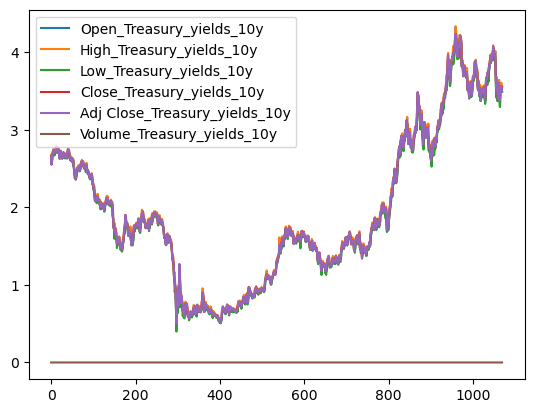

In [99]:
# Reviewing that it can be ploteed
treasury_yield_cols = financial_data.filter(like='Treasury_yields_10y')
treasury_yield_cols.plot();

# 3.Loading and cleaning COVID Data

In [103]:
# Loading our world in data COVID database (https://ourworldindata.org/coronavirus)
covid_data= pd.read_csv('owid-covid-data.csv')

In [105]:
covid_data['date']=pd.to_datetime(covid_data['date'])

In [109]:
covid_data.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [111]:
#reviewing info
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299131 entries, 0 to 299130
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    299131 non-null  object        
 1   continent                                   284913 non-null  object        
 2   location                                    299131 non-null  object        
 3   date                                        299131 non-null  datetime64[ns]
 4   total_cases                                 263354 non-null  float64       
 5   new_cases                                   290604 non-null  float64       
 6   new_cases_smoothed                          289340 non-null  float64       
 7   total_deaths                                243229 non-null  float64       
 8   new_deaths                                  290686 non-null  float64      

# 4.Loading and cleaning GDP OECD Data

In [ ]:
# OECD GPD Data comes from https://www.oecd.org/economy/weekly-tracker-of-gdp-growth/

In [112]:
df_gdp= pd.read_excel('weekly_tracker_level.xlsx')

In [113]:
df_gdp.head(3)

,region,date,Tracker (log-deviation),Low (log-deviation),High (log-deviation),Tracker (level),Low (level),High (level),ISO3
0,Argentina,2004-01-04,-0.192867,-0.265017,-0.163745,69.278526,64.456145,71.325764,ARG
1,Argentina,2004-01-11,-0.156212,-0.193930,-0.113717,71.881486,69.220764,75.001883,ARG
2,Argentina,2004-01-18,-0.145192,-0.174534,-0.118523,72.702860,70.600659,74.667896,ARG


In [114]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47141 entries, 0 to 47140
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   region                   47141 non-null  object        
 1   date                     47141 non-null  datetime64[ns]
 2   Tracker (log-deviation)  47090 non-null  float64       
 3   Low (log-deviation)      47090 non-null  float64       
 4   High (log-deviation)     47090 non-null  float64       
 5   Tracker (level)          47090 non-null  float64       
 6   Low (level)              47090 non-null  float64       
 7   High (level)             47090 non-null  float64       
 8   ISO3                     47090 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 3.2+ MB


# 5.Merging DF's and final export to Tableau

In [117]:
#Filtering COVID DATA that have only ISO code of OECD countries
OECD_countries = ['AUS','AUT','BEL','CAN','CHL','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','ISL','IRL','ISR','ITA','JPN','KOR','LVA','LTU','LUX','MEX','NLD','NZL','NOR','POL','PRT','SVK','SVN','ESP','SWE','CHE','TUR','GBR','USA','COL','CRI']

In [118]:
country_data = pd.merge(covid_data, df_gdp, left_on=['iso_code', 'date'], right_on=['ISO3', 'date'], how='left')

In [119]:
OECD_data = country_data[country_data['iso_code'].isin(OECD_countries)]

In [120]:
OECD_data['iso_code'].value_counts()

ITA    1186
DEU    1186
SWE    1186
ESP    1186
AUT    1186
KOR    1186
GRC    1186
CZE    1186
ISR    1186
DNK    1185
POL    1185
MEX    1184
FRA    1184
NLD    1184
LTU    1184
CHL    1184
AUS    1183
JPN    1183
IRL    1182
ISL    1182
GBR    1182
TUR    1182
CHE    1182
BEL    1182
CAN    1182
COL    1182
SVN    1182
SVK    1182
PRT    1182
CRI    1182
NOR    1182
NZL    1182
EST    1182
FIN    1182
LUX    1182
HUN    1182
LVA    1182
USA    1182
Name: iso_code, dtype: int64

In [121]:
#Reviewing final dataframe
OECD_data[OECD_data['location']=='Chile']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,excess_mortality,excess_mortality_cumulative_per_million,region,Tracker (log-deviation),Low (log-deviation),High (log-deviation),Tracker (level),Low (level),High (level),ISO3
50848,CHL,South America,Chile,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50849,CHL,South America,Chile,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50850,CHL,South America,Chile,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,-24.01,-25.134302,Chile,-0.01185,-0.026677,0.00196,103.826778,102.298734,105.270593,CHL
50851,CHL,South America,Chile,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50852,CHL,South America,Chile,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52027,CHL,South America,Chile,2023-03-27,5252523.0,2446.0,3068.857,64497.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52028,CHL,South America,Chile,2023-03-28,5254227.0,1704.0,2966.714,64497.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52029,CHL,South America,Chile,2023-03-29,5255620.0,1393.0,2841.429,64497.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52030,CHL,South America,Chile,2023-03-30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
OECD_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44970 entries, 15376 to 282657
Data columns (total 75 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    44970 non-null  object        
 1   continent                                   44970 non-null  object        
 2   location                                    44970 non-null  object        
 3   date                                        44970 non-null  datetime64[ns]
 4   total_cases                                 43242 non-null  float64       
 5   new_cases                                   44848 non-null  float64       
 6   new_cases_smoothed                          44653 non-null  float64       
 7   total_deaths                                42311 non-null  float64       
 8   new_deaths                                  44865 non-null  float64       
 9   n

### Export to Country data to Tableau

In [124]:
OECD_data.to_csv('OECD_DATA_3.csv')